In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn.metrics import accuracy_score
import warnings

%matplotlib inline

In [2]:
warnings.filterwarnings("ignore")

In [114]:
df = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
test_copy = pd.read_csv("data/test.csv")
sample_sub = pd.read_csv('data/gender_submission.csv')

In [115]:
print(df.head())
print(df.shape)
print(test.columns)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

In [116]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [117]:
print(df.head())
print(df.shape)

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
(891, 8)


In [118]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [119]:
df.describe(percentiles=[0.25, 0.5, 0.95]).T

,count,mean,std,min,25%,50%,95%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.00000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.00000,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,56.00000,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,3.00000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,2.00000,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,112.07915,512.3292


In [120]:
def count_features(features):
    for i, col in enumerate(features.columns):
        plt.figure(i)
        sns.countplot(x=features[col], hue=df['Survived'])

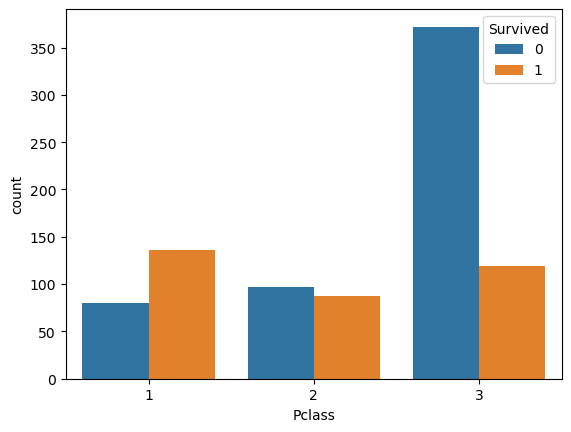

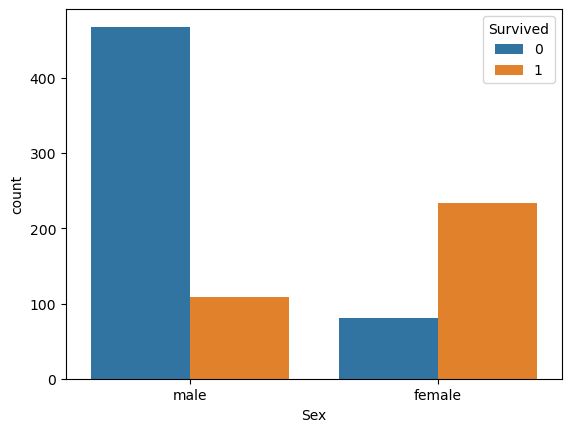

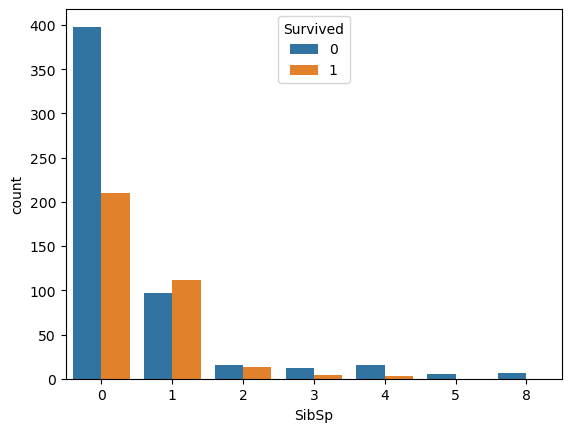

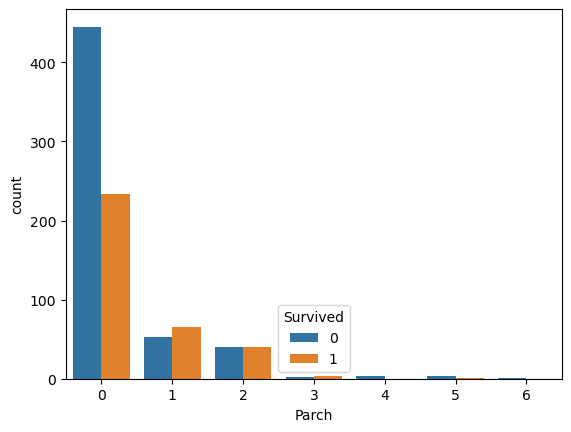

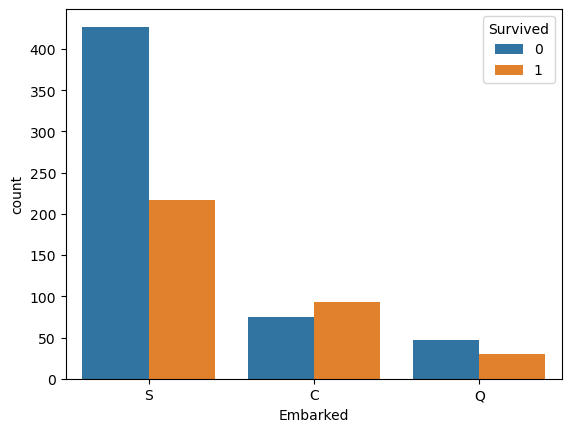

In [121]:
features = df.drop(['Survived', 'Age', 'Fare'], axis=1)
count_features(features)

In [122]:
correlation = df.corr()

In [123]:
correlation

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

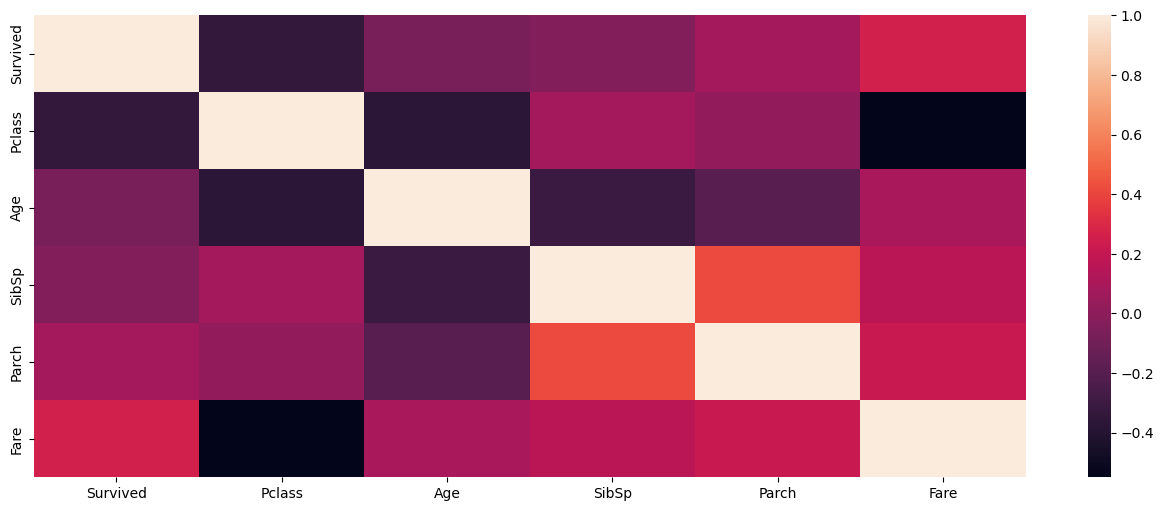

In [124]:
plt.figure(figsize=(16, 6))
sns.heatmap(correlation)

In [125]:
median_age = np.median(df["Age"])
df["Age"].fillna(median_age, inplace=True)
df["Embarked"].fillna("S", inplace=True)
df.isnull().sum().sum()

177

In [126]:
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Pclass', ylabel='count'>

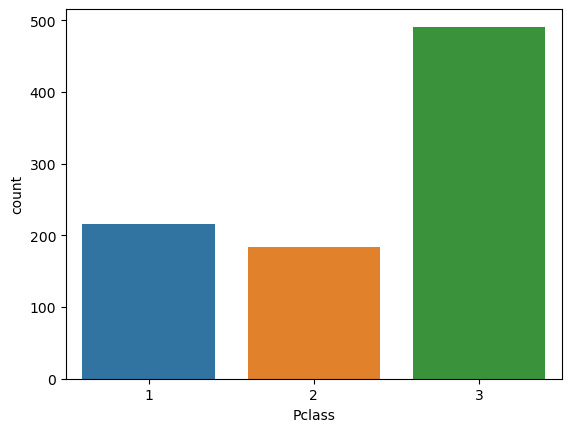

In [127]:
sns.countplot(df["Pclass"])

<AxesSubplot:ylabel='Embarked'>

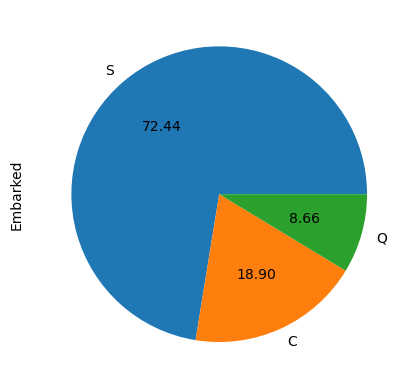

In [128]:
df['Embarked'].value_counts().plot(kind='pie', autopct='%.2f')

<AxesSubplot:ylabel='Sex'>

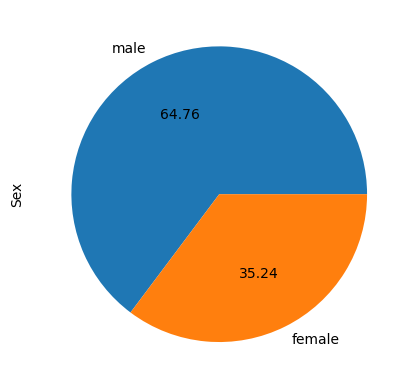

In [129]:
df['Sex'].value_counts().plot(kind='pie', autopct='%.2f')

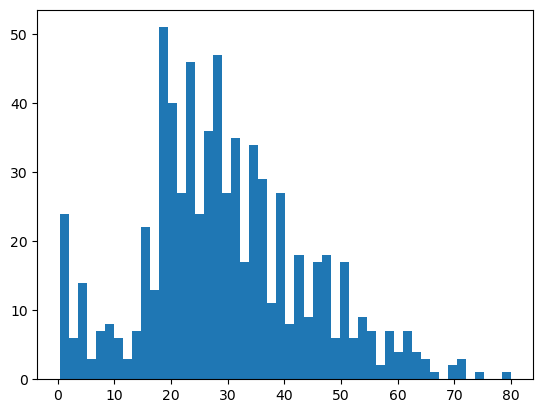

In [130]:
plt.hist(df['Age'], bins=50)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

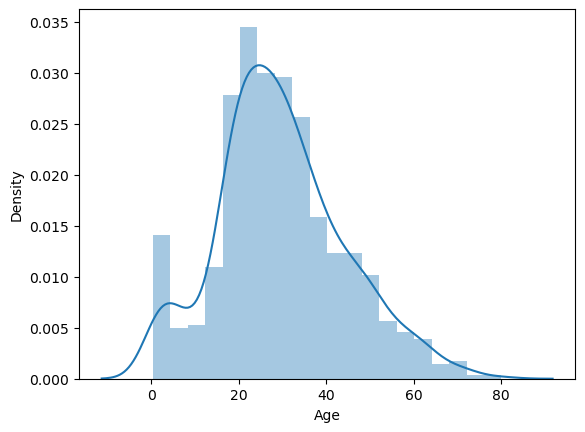

In [131]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Age'>

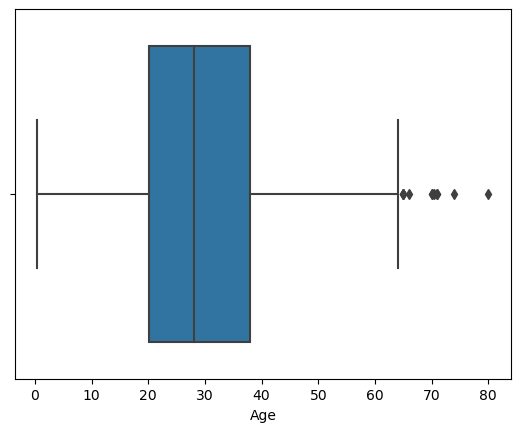

In [132]:
sns.boxplot(df['Age'])

In [133]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]

# Extract the features and terget variable
X_train = df[features]
y_train = df["Survived"]

X_test = test[features]

In [134]:
X_train.isnull().sum(), y_train.isnull().sum(), X_test.isnull().sum()

(Pclass      0
 Sex         0
 Age       177
 SibSp       0
 Parch       0
 Fare        0
 dtype: int64,
 0,
 Pclass     0
 Sex        0
 Age       86
 SibSp      0
 Parch      0
 Fare       1
 dtype: int64)

In [135]:
X_train["Age"].fillna(X_train["Age"].mean(),inplace=True)

X_test["Age"].fillna(X_test["Age"].mean(),inplace=True)

X_test["Fare"].fillna(X_test["Fare"].mean(),inplace=True)

In [136]:
X_train.isnull().sum(), y_train.isnull().sum(), X_test.isnull().sum()

(Pclass    0
 Sex       0
 Age       0
 SibSp     0
 Parch     0
 Fare      0
 dtype: int64,
 0,
 Pclass    0
 Sex       0
 Age       0
 SibSp     0
 Parch     0
 Fare      0
 dtype: int64)

In [137]:
X_train.dtypes, X_test.dtypes

(Pclass      int64
 Sex        object
 Age       float64
 SibSp       int64
 Parch       int64
 Fare      float64
 dtype: object,
 Pclass      int64
 Sex        object
 Age       float64
 SibSp       int64
 Parch       int64
 Fare      float64
 dtype: object)

In [138]:
X_train_dummies = pd.get_dummies(X_train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]])
X_test_dummies = pd.get_dummies(X_test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]])

In [139]:
X_train_dummies

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.000000,1,0,7.2500,0,1
1,1,38.000000,1,0,71.2833,1,0
2,3,26.000000,0,0,7.9250,1,0
3,1,35.000000,1,0,53.1000,1,0
4,3,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1
887,1,19.000000,0,0,30.0000,1,0
888,3,29.699118,1,2,23.4500,1,0
889,1,26.000000,0,0,30.0000,0,1


In [140]:
X_test_dummies

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,34.50000,0,0,7.8292,0,1
1,3,47.00000,1,0,7.0000,1,0
2,2,62.00000,0,0,9.6875,0,1
3,3,27.00000,0,0,8.6625,0,1
4,3,22.00000,1,1,12.2875,1,0
...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,0,1
414,1,39.00000,0,0,108.9000,1,0
415,3,38.50000,0,0,7.2500,0,1
416,3,30.27259,0,0,8.0500,0,1


In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
scaler = StandardScaler()

X_train_dummies = scaler.fit_transform(X_train_dummies)

X_test_dummies = scaler.transform(X_test_dummies) 

In [143]:
X_train_dummies

array([[ 0.82737724, -0.5924806 ,  0.43279337, ..., -0.50244517,
        -0.73769513,  0.73769513],
       [-1.56610693,  0.63878901,  0.43279337, ...,  0.78684529,
         1.35557354, -1.35557354],
       [ 0.82737724, -0.2846632 , -0.4745452 , ..., -0.48885426,
         1.35557354, -1.35557354],
       ...,
       [ 0.82737724,  0.        ,  0.43279337, ..., -0.17626324,
         1.35557354, -1.35557354],
       [-1.56610693, -0.2846632 , -0.4745452 , ..., -0.04438104,
        -0.73769513,  0.73769513],
       [ 0.82737724,  0.17706291, -0.4745452 , ..., -0.49237783,
        -0.73769513,  0.73769513]])

In [144]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train_dummies, y_train)

RandomForestClassifier()

In [145]:
model.score(X_train_dummies, y_train)

0.9820426487093153

In [146]:
print(test_copy.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [147]:
y_preds = model.predict(X_test_dummies)

# Create a submission dataframe
submission_df = pd.DataFrame({'PassengerId': test_copy['PassengerId'], 'Survived': y_preds})

# Save the submission dataframe to a CSV file
submission_df.to_csv('submission.csv', index=False)

In [148]:
print(submission_df)

     PassengerId  Survived
0            892         0
1            893         0
2            894         1
3            895         1
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
